<a href="https://colab.research.google.com/github/RifatMuhtasim/Data_Science/blob/main/Exploratory_Data_Analysis/Explore_Distribution_Of_Target_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [110]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df['classification'] = iris.target
df['regression'] = (df['sepal length (cm)'] * df['sepal width (cm)']) + (df['petal length (cm)'] * df['petal width (cm)'])

df0 = df.copy()
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression
0,5.1,3.5,1.4,0.2,0,18.13
1,4.9,3.0,1.4,0.2,0,14.98
2,4.7,3.2,1.3,0.2,0,15.30
3,4.6,3.1,1.5,0.2,0,14.56
4,5.0,3.6,1.4,0.2,0,18.28


In [111]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis

def Histogram_plot_kde(df, x):
    hist_data = df[x]
    skewness = skew(hist_data)
    kurtosis_value = kurtosis(hist_data)
    fig = ff.create_distplot([hist_data], [x], curve_type='kde')
    fig.update_layout(title= f"{x} Distribution. Skewness: {round(skewness, 2)} and Kurtosis: {round(kurtosis_value, 2)}")
    fig.show()

In [112]:
Histogram_plot_kde(df, 'regression')

Skew: 0.5833223047336429
Kurtosis: -0.277778730138444


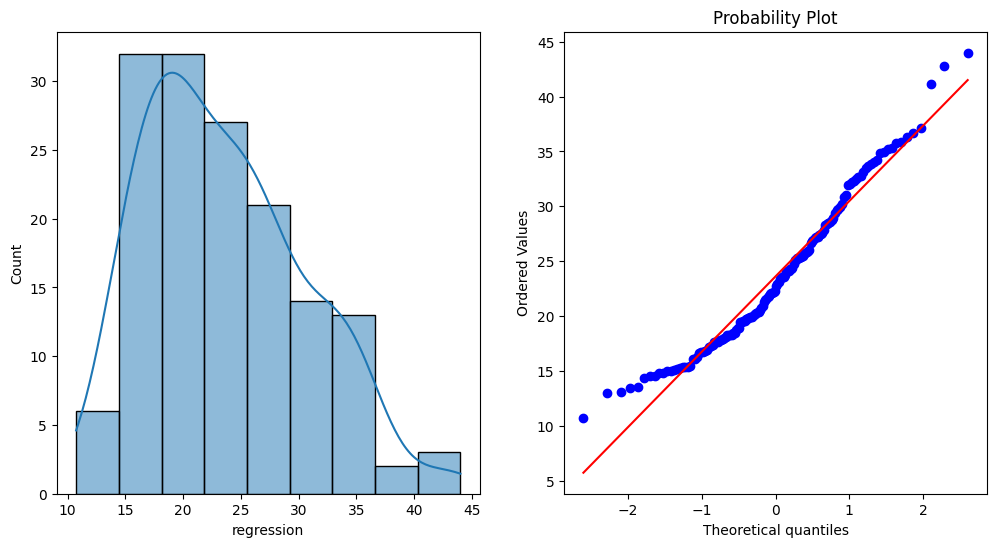

In [113]:
import scipy.stats as stat
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import pylab


def Diagnostic_plot(df, x):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[x],  kde=True)
    plt.subplot(1, 2, 2)
    stat.probplot(df[x], dist="norm", plot = pylab)

    print("Skew:", skew(df[x]))
    print("Kurtosis:", kurtosis(df[x]))
    plt.show()

Diagnostic_plot(df, 'regression')

# Explore correlation

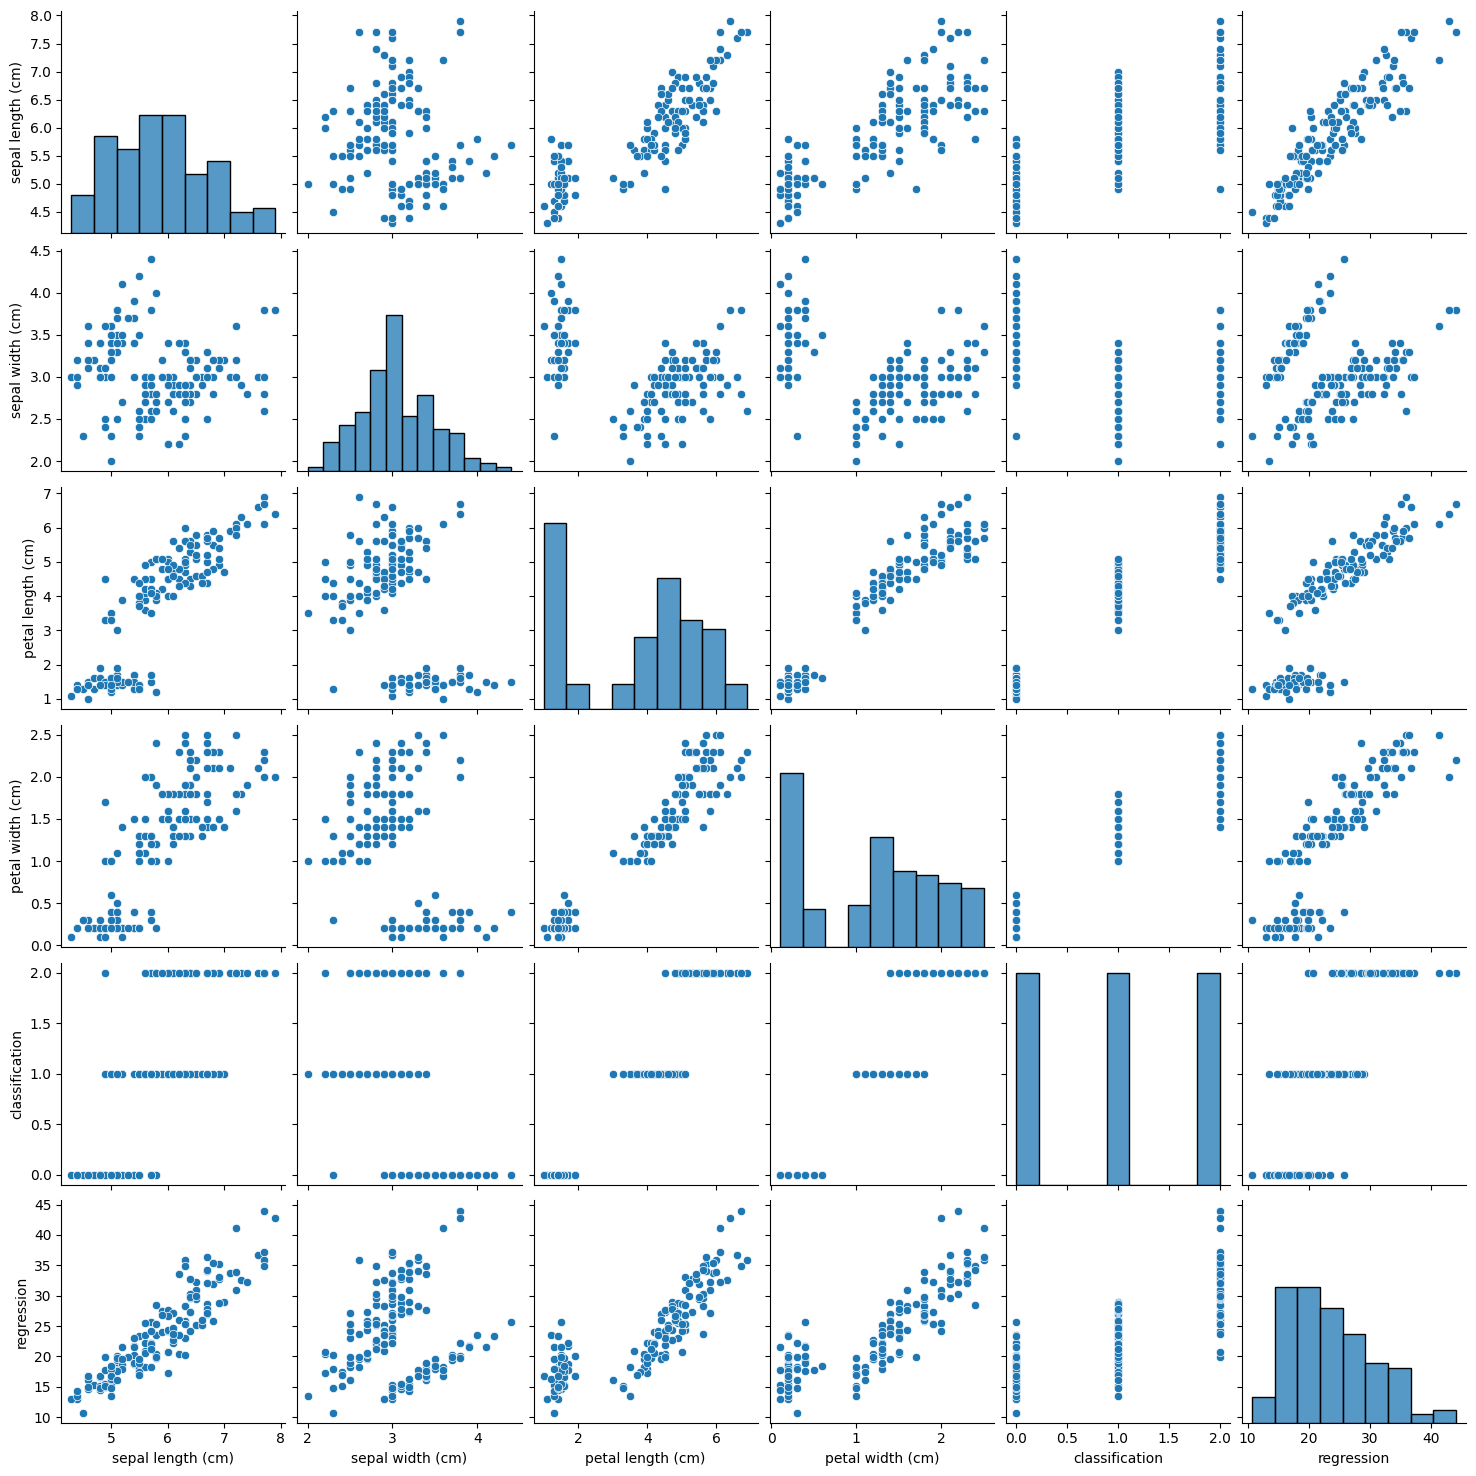

In [114]:
# Compute pairwise correlation

numerical_df = df.select_dtypes(include=['int', 'float'])
sns.pairplot(numerical_df)

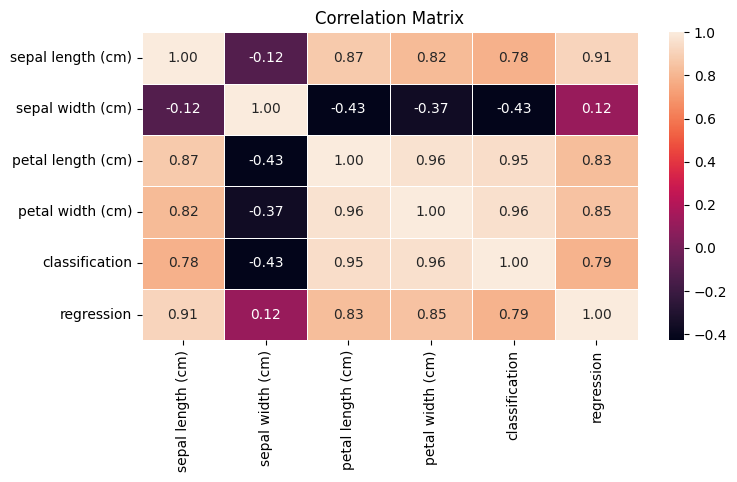

In [115]:
# Visualize Correlation using Heatmap

plt.figure(figsize=(8, 4))
numerical_df = df.select_dtypes(include=['int', 'float'])
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [116]:
# Drop Highly Correlated Columns

# Drop Highly Correlated Columns

def High_correlated(dataset, threshold):
    high_correlated = []
    correlation_matrix = dataset.corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > threshold:
                colname = correlation_matrix.columns[i]
                high_correlated.append(colname)
    return high_correlated


high_correlated_features = High_correlated(df, 0.8)
high_correlated_features

['petal length (cm)',
 'petal width (cm)',
 'petal width (cm)',
 'classification',
 'classification',
 'regression',
 'regression',
 'regression']

In [117]:
not_remove = ['classification', 'classification',  'regression', 'regression', 'regression' ]
print("Not Remove: ", not_remove)

high_correlated_features = [item for item in high_correlated_features if item not in not_remove]
high_correlated_features

Not Remove:  ['classification', 'classification', 'regression', 'regression', 'regression']


['petal length (cm)', 'petal width (cm)', 'petal width (cm)']

In [118]:
# df = df.drop(high_correlated_features, axis="columns")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression
0,5.1,3.5,1.4,0.2,0,18.13
1,4.9,3.0,1.4,0.2,0,14.98
2,4.7,3.2,1.3,0.2,0,15.30
3,4.6,3.1,1.5,0.2,0,14.56
4,5.0,3.6,1.4,0.2,0,18.28


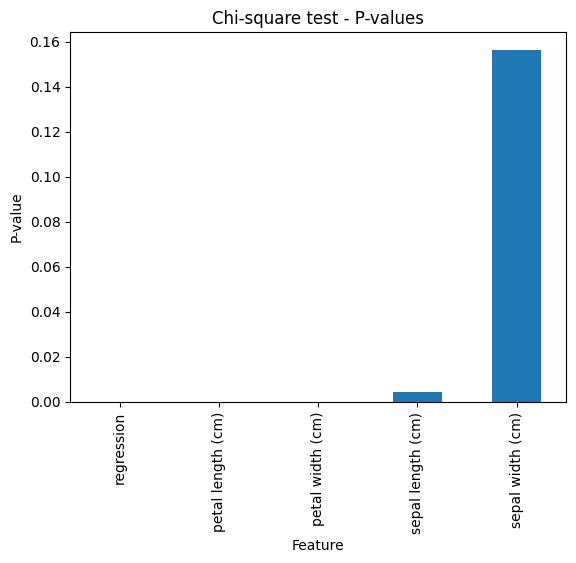

In [119]:
from sklearn.feature_selection import chi2

X = df.drop('classification', axis=1)
y = df['classification']
chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)
p_values.plot.bar()
plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.show()

In [122]:
def Classification_correlation_ratio(df, target):
    df_copy = df.copy()
    def correlation_ratio(categories, measurements):
        # Convert categorical labels to integers
        categories = np.array(categories)
        unique_categories = np.unique(categories)
        category_counts = {category: np.sum(categories == category) for category in unique_categories}
        # Total sum of squares
        total_variance = np.var(measurements) * (len(measurements) - 1)

        # Between-group sum of squares
        numerator = 0
        for category, count in category_counts.items():
            category_measurements = measurements[categories == category]
            numerator += count * np.var(category_measurements)

        # Calculate correlation ratio
        eta = numerator / total_variance
        return eta

    columns = [col for col in df_copy.columns]
    correlation_df = pd.DataFrame(columns=['column', 'value'])
    for i in columns:
        correlation_eta = correlation_ratio(df_copy[target], df_copy[i])
        correlation_df = pd.concat([correlation_df, pd.DataFrame({'column': [i], 'value': [correlation_eta]})], ignore_index=True)

    correlation_df = correlation_df[correlation_df['column'] != target]
    return correlation_df.sort_values("value", ascending=False)

In [124]:
correlation_df = Classification_correlation_ratio(df= df, target= 'classification')
correlation_df

,column,value
1,sepal width (cm),0.603239
0,sepal length (cm),0.383853
5,regression,0.357806
3,petal width (cm),0.071594
2,petal length (cm),0.059022


In [126]:
removed_columns = correlation_df[
    (correlation_df['value'] > 0.95) |
    ((correlation_df['value'] < 0.05) & (correlation_df['value'] >= 0.00)) |
    (correlation_df['value'].isna())
]['column'].tolist()

removed_columns

[]